# CS2006 Advanced Programming Projects

## Python - Group Project 2

## Data analysis with pandas

## Introduction

## Problems Encountered and How we Solved Them

## Reproductivity and Reusability

## Sumary of Provenance

## Design

In [3]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pd.options.display.max_rows = 4000

We start with exploring the content of the dataset and setting idColumn - this will be used throughout the program for purposes regarding reusability.




In [4]:
filePath    = "../data/census2011.csv"          # Path to dataset                               - Replace as needed for alternative datasets
refinedPath = "../data/refined_census2011.csv"  # Path where refined dataset will be created    - Replace as needed or prefered by user
idColumn    = "Person ID"                       # Name of ID column                             - Replace as needed for alternative datasets

df = pd.read_csv(filePath)                      # Creates the dataframe (unrefined data)

In [5]:
df

Person ID     Region Residence Type  Family Composition  \
0         7394816  E12000001              H                   2   
1         7394745  E12000001              H                   5   
2         7395066  E12000001              H                   3   
3         7395329  E12000001              H                   3   
4         7394712  E12000001              H                   3   
...           ...        ...            ...                 ...   
569736    7946020  W92000004              H                   1   
569737    7944310  W92000004              H                   3   
569738    7945374  W92000004              H                   3   
569739    7944768  W92000004              H                   1   
569740    7944959  W92000004              H                   2   

        Population Base  Sex  Age  Marital Status  Student  Country of Birth  \
0                     1    2    6               2        2                 1   
1                     1    1    4               1        2                 1   
2                     1    2    4               1        2                 1   
3                     1    2    2               1        2                 1   
4                     1    1    5               4        2                 1   
...                 ...  ...  ...             ...      ...               ...   
569736                1    1    5               1        2                 1   
569737                1    1    3               1        2                 1   
569738                1    1    1               1        1                 1   
569739                1    2    8               5        2                 1   
569740                1    2    2               2        2                 1   

        Health  Ethnic Group  Religion  Economic Activity  Occupation  \
0            2             1         2                  5           8   
1            1             1         2                  1           8   
2            1             1         1                  1           6   
3            2             1         2                  1           7   
4            1             1         2                  1           1   
...        ...           ...       ...                ...         ...   
569736       4             1         9                  1           8   
569737       2             1         1                  1           7   
569738       1             1         2                 -9          -9   
569739       3             1         9                  5           9   
569740       2             1         1                  1           7   

        Industry  Hours worked per week  Approximated Social Grade  
0              2                     -9                          4  
1              6                      4                          3  
2             11                      3                          4  
3              7                      3                          2  
4              4                      3                          2  
...          ...                    ...                        ...  
569736         8                      3                          3  
569737         4                      3                          4  
569738        -9                     -9                         -9  
569739         2                     -9                          4  
569740         4                      1                          4  

[569741 rows x 18 columns]

# Refining the data 

We decided it would be best to create an external python script to clean and validate the data given.
In the python script, we had four aims:

- check the file has not been corrupted
- check the data has no duplicates
- check the values are of expected types
- checks there are no logical contradictions in the file

When running the python file, each of these aims are achieved, ammended and then written to another csv file.

**Please wait for script to finish before continuing.**

In [6]:
%run refine_csv.py ../data/census2011.csv ../data/refined_census2011.csv

Starting...
Removed 1 / 546787 rows from new file.
New file  ../data/refined_census2011.csv written.
...Done


This runs, and creates a refined csv file named 'refined.csv'. From now on, we will use this file instead.

In [7]:
df = pd.read_csv(refinedPath)   # Replaces df with refined data
df                              # Displays new dataset

Person ID     Region Residence Type  Family Composition  \
0         7394816  E12000001              H                   2   
1         7394745  E12000001              H                   5   
2         7395066  E12000001              H                   3   
3         7395329  E12000001              H                   3   
4         7394712  E12000001              H                   3   
...           ...        ...            ...                 ...   
569735    7946020  W92000004              H                   1   
569736    7944310  W92000004              H                   3   
569737    7945374  W92000004              H                   3   
569738    7944768  W92000004              H                   1   
569739    7944959  W92000004              H                   2   

        Population Base  Sex  Age  Marital Status  Student  Country of Birth  \
0                     1    2    6               2        2                 1   
1                     1    1    4               1        2                 1   
2                     1    2    4               1        2                 1   
3                     1    2    2               1        2                 1   
4                     1    1    5               4        2                 1   
...                 ...  ...  ...             ...      ...               ...   
569735                1    1    5               1        2                 1   
569736                1    1    3               1        2                 1   
569737                1    1    1               1        1                 1   
569738                1    2    8               5        2                 1   
569739                1    2    2               2        2                 1   

        Health  Ethnic Group  Religion  Economic Activity  Occupation  \
0            2             1         2                  5           8   
1            1             1         2                  1           8   
2            1             1         1                  1           6   
3            2             1         2                  1           7   
4            1             1         2                  1           1   
...        ...           ...       ...                ...         ...   
569735       4             1         9                  1           8   
569736       2             1         1                  1           7   
569737       1             1         2                 -9          -9   
569738       3             1         9                  5           9   
569739       2             1         1                  1           7   

        Industry  Hours worked per week  Approximated Social Grade  
0              2                     -9                          4  
1              6                      4                          3  
2             11                      3                          4  
3              7                      3                          2  
4              4                      3                          2  
...          ...                    ...                        ...  
569735         8                      3                          3  
569736         4                      3                          4  
569737        -9                     -9                         -9  
569738         2                     -9                          4  
569739         4                      1                          4  

[569740 rows x 18 columns]

## Convert Neumeric to Textual Representation

We decided to address the requirement regarding output with this function which will take the dataframe and convert it's contents into their textual representatation equivelent.
Using a dictionary, it goes through all the values matching and replacing values for the dataset. While doing this takes a few seconds, it only needs to be run once.

Additionally, the function was designed to be reusable and should work for ANY dataframe so long as an appropriate dictionary is provided (The current dictionary is designed for the 2011 census).

Any dataframe with matching variables to that of the census will also work without any changes to the code, allowing for reproducibility alongiside reusability.

In [8]:
from VariableDictionary import varDict                  # Variable Dictionary
from DescriptiveAnalysis import convertInterpretation   # Function which converts a variables alpha neumeric code to the textual interpretation 

df = convertInterpretation(df, idColumn, varDict)       # performs the convertion for a dataframe using a dictionary, the process ignores the ID Column


Starting...
Ignoring Person ID
Region Found - Processing...
Residence Type Found - Processing...
Family Composition Found - Processing...
Population Base Found - Processing...
Sex Found - Processing...
Age Found - Processing...
Marital Status Found - Processing...
Student Found - Processing...
Country of Birth Found - Processing...
Health Found - Processing...
Ethnic Group Found - Processing...
Religion Found - Processing...
Economic Activity Found - Processing...
Occupation Found - Processing...
Industry Found - Processing...
Hours worked per week Found - Processing...
Approximated Social Grade Found - Processing...
...Done


The contents of the dataframe have now been completely converted to their textual representation.


In [9]:
df

Person ID      Region                            Residence Type  \
0         7394816  North East  Not resident in a communal establishment   
1         7394745  North East  Not resident in a communal establishment   
2         7395066  North East  Not resident in a communal establishment   
3         7395329  North East  Not resident in a communal establishment   
4         7394712  North East  Not resident in a communal establishment   
...           ...         ...                                       ...   
569735    7946020       Wales  Not resident in a communal establishment   
569736    7944310       Wales  Not resident in a communal establishment   
569737    7945374       Wales  Not resident in a communal establishment   
569738    7944768       Wales  Not resident in a communal establishment   
569739    7944959       Wales  Not resident in a communal establishment   

                                      Family Composition Population Base  \
0       Married/same-sex civil partnership couple family  Usual resident   
1                       Lone parent family (female head)  Usual resident   
2                               Cohabiting couple family  Usual resident   
3                               Cohabiting couple family  Usual resident   
4                               Cohabiting couple family  Usual resident   
...                                                  ...             ...   
569735                                   Not in a family  Usual resident   
569736                          Cohabiting couple family  Usual resident   
569737                          Cohabiting couple family  Usual resident   
569738                                   Not in a family  Usual resident   
569739  Married/same-sex civil partnership couple family  Usual resident   

           Sex          Age  \
0       Female     55 to 64   
1         Male     35 to 44   
2       Female     35 to 44   
3       Female     16 to 24   
4         Male     45 to 54   
...        ...          ...   
569735    Male     45 to 54   
569736    Male     25 to 34   
569737    Male      0 to 15   
569738  Female  75 and over   
569739  Female     16 to 24   

                                           Marital Status Student  \
0       Married or in a registered same-sex civil part...      No   
1       Single (never married or never registered a sa...      No   
2       Single (never married or never registered a sa...      No   
3       Single (never married or never registered a sa...      No   
4       Divorced or formerly in a same-sex civil partn...      No   
...                                                   ...     ...   
569735  Single (never married or never registered a sa...      No   
569736  Single (never married or never registered a sa...      No   
569737  Single (never married or never registered a sa...     Yes   
569738  Widowed or surviving partner from a same-sex c...      No   
569739  Married or in a registered same-sex civil part...      No   

       Country of Birth            Health Ethnic Group     Religion  \
0                    UK       Good health        White    Christian   
1                    UK  Very good health        White    Christian   
2                    UK  Very good health        White  No religion   
3                    UK       Good health        White    Christian   
4                    UK  Very good health        White    Christian   
...                 ...               ...          ...          ...   
569735               UK        Bad health        White   Not stated   
569736               UK       Good health        White  No religion   
569737               UK  Very good health        White    Christian   
569738               UK       Fair health        White   Not stated   
569739               UK       Good health        White  No religion   

                     Economic Activity  \
0       Economically inactive: Retired   
1        Economically active: Employee   
2        Econ

## Descriptive Analysis of the Dataset - Part 1

Here we determine the total number of records in the data set and the type of each variable.

Simply run it and it will work for any dataset so long as its been read into df. 

(Note that because we converted the contents of the dataframe from the alphaneumeric code to the textual representation all int64 types have changed to object.)

In [10]:
from DescriptiveAnalysis import totalRecords
from DescriptiveAnalysis import varTypes

totalRecords(df)
varTypes(df)


Total Number of records = 569740 

Type of each Variables
Person ID                     int64
Region                       object
Residence Type               object
Family Composition           object
Population Base              object
Sex                          object
Age                          object
Marital Status               object
Student                      object
Country of Birth             object
Health                       object
Ethnic Group                 object
Religion                     object
Economic Activity            object
Occupation                   object
Industry                     object
Hours worked per week        object
Approximated Social Grade    object
dtype: object


## Descriptive Analysis of the Dataset - Part 2

for each variable except the ID/Primary Key, find all different values that it takes, and the number of occurrences for each value.

The function that performs this has been coded to ignore the idColumn (in this case 'Person ID') but will provide the required output for all other variables (and their values) in the dataset.

In [11]:
from DescriptiveAnalysis import occurancesOfValues
occurancesOfValues(df, idColumn)

------------------
Region
East Midlands               45782
East of England             59411
London                      83582
North East                  26349
North West                  71436
South East                  88084
South West                  53774
Wales                       30976
West Midlands               56875
Yorkshire and the Humber    53471
dtype: int64

------------------
Residence Type
Not resident in a communal establishment    559086
Resident in a communal establishment         10654
dtype: int64

------------------
Family Composition
Cohabiting couple family                             72641
Lone parent family (female head)                     64519
Lone parent family (male head)                        9848
Married/same-sex civil partnership couple family    300961
No code required                                     18851
Not in a family                                      96690
Other related family                                  6230
dtype: int64

-----

## Plot Building

---
Using matplotlibs, numpy and pandas we created plots to visualise some data.

We decided for the purpose of readability, we would create the horizontal bar charts.

In [12]:
dataset1y = sorted(df["Region"].unique())
dataset1x = df.groupby("Region")["Person ID"].count()

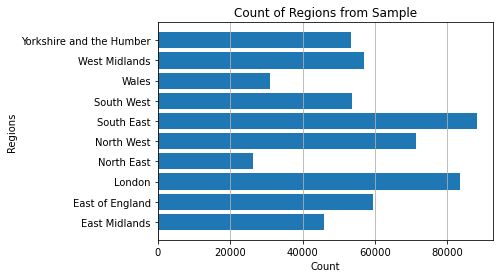

In [13]:
plot2 = plt.barh(dataset1y, dataset1x)
plt.title('Count of Regions from Sample')
plt.ylabel('Regions')
plt.xlabel('Count')
plt.grid(axis='x')

plt.show()

In [14]:
dataset2y = sorted(df["Occupation"].unique())
dataset2x = df.groupby("Occupation")["Person ID"].count()


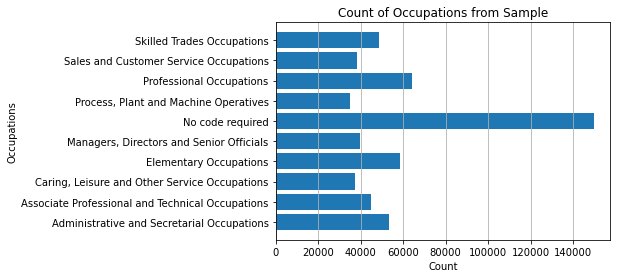

In [15]:
plot1 = plt.barh(dataset2y, dataset2x)
plt.title('Count of Occupations from Sample')
plt.ylabel('Occupations')
plt.xlabel('Count')
plt.grid(axis='x')

plt.show()

In [16]:
dataset3a = sorted(df["Age"].unique())
dataset3b = df.groupby("Age")["Person ID"].count()

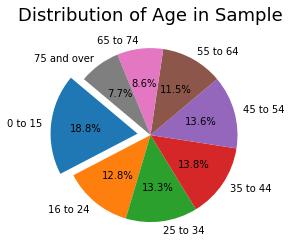

In [17]:
explode = (0.15, 0, 0, 0, 0, 0 ,0, 0)

plt.pie(dataset3b, labels=dataset3a, autopct='%1.1f%%',
        startangle=140, explode = explode)

plt.title('Distribution of Age in Sample', fontsize=18, color='Black')

plt.show()

In [18]:
dataset4a = sorted(df["Economic Activity"].unique())
dataset4b = df.groupby("Economic Activity")["Person ID"].count()

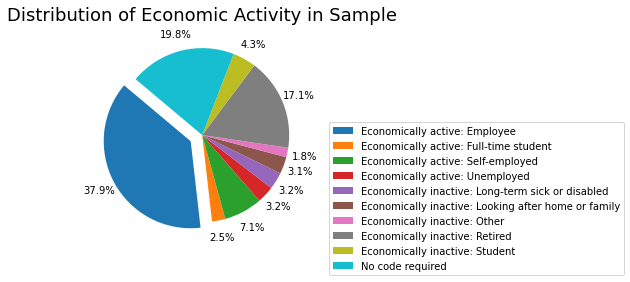

In [19]:
explode = (0.15, 0, 0, 0, 0, 0 ,0, 0, 0, 0)

plt.pie(dataset4b, autopct='%1.1f%%', 
        startangle=140, explode = explode, pctdistance= 1.2)
.6
plt.title('Distribution of Economic Activity in Sample', fontsize=18, color='Black')

plt.legend(labels=dataset4a, bbox_to_anchor=(1.5, 0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

# Additional Requirements

## Easy 1 - Tables
---
> using groupby objects, produce the following tables:
>- number of records by region and industry 
>- number of records by occupation and social grade
---

This requirement asked us to create two tables, one that counts the number of records grouped by Industry and Region. Although the requirement was quite ambiguous, we decided to order it Industry and then Region, because we feel the data is displayed better and neater this way.


#### Number of Records by Region and Industry

In [194]:
easy1a = df.groupby(by=["Industry", "Region"])["Person ID"].count()
regions = df.groupby(by=["Region"])["Person ID"].count()
industries = df.groupby(by=["Industry"])["Person ID"].count()

xaxislabels = sorted(df["Region"].unique())
yaxislabels = sorted(df["Industry"].unique())

print(easy1a)


Industry                                                                                                                                          Region                  
Accommodation and food service activities                                                                                                         East Midlands                1936
                                                                                                                                                  East of England              2336
                                                                                                                                                  London                       4054
                                                                                                                                                  North East                   1300
                                                                                                             

#### Number of Records by Occupation and Social Grade

In [195]:
easy1b = df.groupby(by=["Approximated Social Grade", "Occupation"])["Person ID"].count()

occupations = df.groupby(by=["Occupation"])["Person ID"].count()
asgs = df.groupby(by=["Approximated Social Grade"])["Person ID"].count()

xaxislabels2 = sorted(df["Occupation"].unique())
yaxislabels2 = sorted(df["Approximated Social Grade"].unique())

print(easy1b)

Approximated Social Grade  Occupation                                      
AB                         Administrative and Secretarial Occupations            3000
                           Associate Professional and Technical Occupations      7050
                           Caring, Leisure and Other Service Occupations         1061
                           Elementary Occupations                                 902
                           Managers, Directors and Senior Officials             19190
                           No code required                                      1051
                           Process, Plant and Machine Operatives                  413
                           Professional Occupations                             48104
                           Sales and Customer Service Occupations                 964
                           Skilled Trades Occupations                             585
C1                         Administrative and Secretarial Occupa

## Easy 2 - Queries
---

In the following sections we implemented the queries using pandas. We were able to create a function that could provide the final result for 3 of the 4 sub requirements with the only change being to the parameters that are passed into it. This code was designed to be reusable and it can be used for any query and grouped by any variable in the data set. Overall It is highly reusable and reproducable.

> The following queries are performed:
>
>- The amount of economically active people by Region
>- The amount of economically active people by Age
>- All students (students == Age) compared to All student by economic activity (including no code required)
>- The amount of students by the hours worked per week (including no code required)

---

In the 3 "by Variable" queries, we also decided to print the total number at the top indicated by the "Query condition met X times" just for additional use and clarity. 

In the comparison, we print the result generated by both and calculate the discrepancy if there is one (We found there to be one).


In [30]:
from Queries import queryByVar
from Queries import compareQueryResults

In [31]:
query = "Economic_Activity == ['Economically active: Employee','Economically active: Self-employed', 'Economically active: Unemployed', 'Economically active: Full-time student']"

print(queryByVar(df, query, "Region"))     # Economically Active people by Region
print(queryByVar(df, query, "Age"))        # Economically Active people by Age



Query condition met 288882 times - returning breakdown

Region
East Midlands               23106
East of England             30568
London                      44454
North East                  12897
North West                  35204
South East                  45551
South West                  27453
Wales                       14876
West Midlands               27930
Yorkshire and the Humber    26843
dtype: int64

Query condition met 288882 times - returning breakdown

Age
16 to 24       41663
25 to 34       64326
35 to 44       67050
45 to 54       65736
55 to 64       40583
65 to 74        8022
75 and over     1502
dtype: int64


In [32]:
query1 = "Student == 'Yes'"
query2 = "Economic_Activity == ['Economically active: Full-time student', 'No code required']"

compareQueryResults(df, query1, query2) # Compares the number of results generated with the two queries

Query 1: 126537 Results

Query 2: 126735 Results

There is a descripancy of about 198 Results 



In [33]:
query = "Student == 'Yes'"

queryByVar(df, query, "Hours worked per week") # Number of working hours per week By Students


Query condition met 126537 times - returning breakdown



Hours_worked_per_week
Full-time: 31 to 48 hours worked        1683
Full-time: 49 or more hours worked       281
No code required                      115774
Part-time: 15 or less hours worked      6465
Part-time: 16 to 30 hours worked        2334
dtype: int64

## Medium 3
> Build 3D plots based on tables from the 1st Easy requirement.

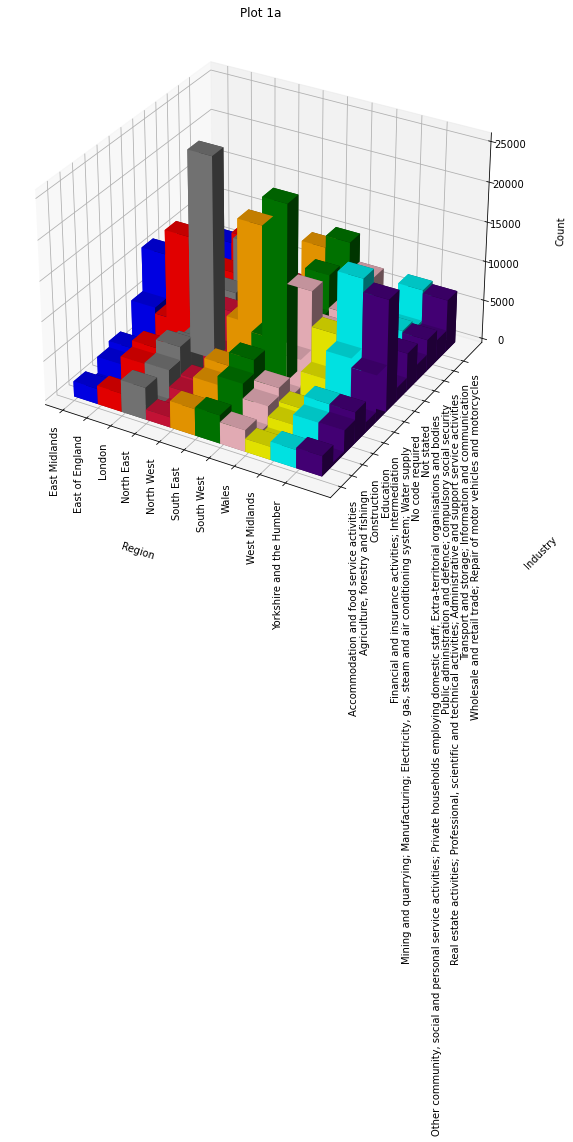

In [235]:
# setup the figure and axes
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(121, projection='3d')

_colors = ["blue", "red","grey", "crimson", "orange", "green", "pink", "yellow", "cyan", "indigo"]
colors = _colors * 13
_x = np.arange(len(regions))
_y = np.arange(len(industries))
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = easy1a
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top,color=colors, shade=True)
ax1.set_xticks(np.arange(len(regions)))
ax1.set_yticks(np.arange(len(industries)))

ax1.set_xticklabels(xaxislabels,rotation='vertical')
ax1.set_yticklabels(yaxislabels,rotation='vertical')

ax1.set_zlabel("Count", labelpad = 25)
ax1.set_xlabel("Region", labelpad = 50)
ax1.set_ylabel("Industry", labelpad = 100)
ax1.set_title('Plot 1a')



plt.show()


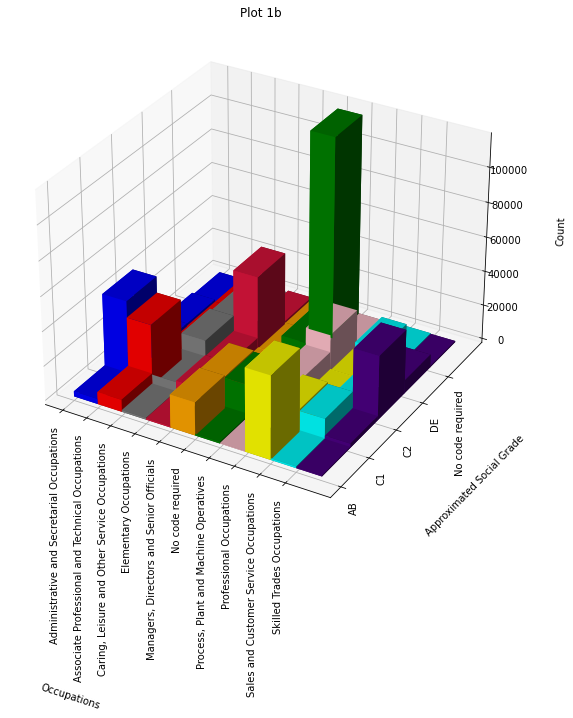

In [239]:
fig = plt.figure(figsize=(20, 20))
ax2 = fig.add_subplot(121, projection='3d')

_colors = ["blue", "red","grey", "crimson", "orange", "green", "pink", "yellow", "cyan", "indigo"]
colors = _colors * 5
_x = np.arange(len(occupations))
_y = np.arange(len(asgs))
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = easy1b

bottom = np.zeros_like(top)
width = depth = 1

ax2.bar3d(x, y, bottom, width, depth, top,color=colors, shade=True)
ax2.set_xticks(np.arange(len(occupations)))
ax2.set_yticks(np.arange(len(asgs) ))
ax2.set_zlabel("Count",  labelpad = 25)

ax2.set_xticklabels(xaxislabels2,rotation='vertical')
ax2.set_yticklabels(yaxislabels2,rotation='vertical')
ax2.set_xlabel("Occupations", labelpad = 150)
ax2.set_ylabel("Approximated Social Grade",  labelpad = 40)
ax2.set_title('Plot 1b')

plt.show()
